# Loading Large datasets with Dask DataFrame

Dataset comes from Kaggle - Seattle Library dataset
https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory

In [1]:
import dask.dataframe as df

Notes: I downloaded the original CSV file and split it into files that each have 2 million rows

In [2]:
library_df = df.read_csv('data2/*')

In [3]:
library_df.head()

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1


In [4]:
%time len(library_df)

CPU times: user 2min 52s, sys: 34.9 s, total: 3min 27s
Wall time: 2min 24s


35531291

Took about 2mn to load and Nb of records is: 35 Millions!

In [5]:
# Group books by publication Year
group_publication_yr = library_df.groupby('PublicationYear').count()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.466202 to fit


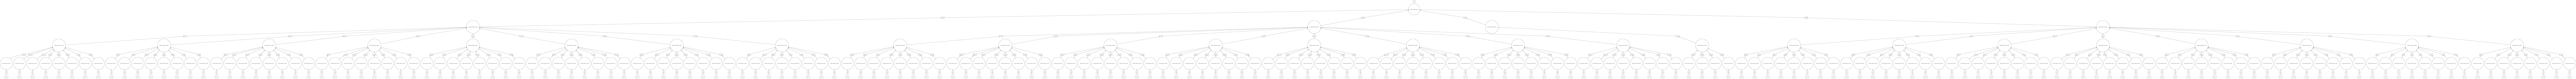

In [6]:
group_publication_yr.visualize(filename='pub_year_graph.png')

In [7]:
# Group by author
group_author = library_df.groupby('Author')['ItemCount'].sum()

In [8]:
%time group_author.compute()

CPU times: user 3min 42s, sys: 35.9 s, total: 4min 18s
Wall time: 3min 7s


Author
!!! (Musical group)                                387
"Avion,", pseud.                                    52
'N Sync (Musical group)                             77
(Alina Iosifovna)                                   51
-Ky                                                 26
                                                  ... 
Merz, Charles, 1893-1977                             1
Nason, Leonard H. (Leonard Hastings), 1895-1970      1
S., Jess,                                            1
Stoughton, Bradley, 1873-1959                        1
Wheeler, Michon.                                     1
Name: ItemCount, Length: 283815, dtype: int64